In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")


In [2]:
ddata=pd.read_csv('diamonds.csv')
ddata

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [3]:
ddata=ddata.drop('Unnamed: 0',axis=1)

In [4]:
ddata.shape

(53940, 10)

In [5]:
ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
ddata.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [7]:
ddata.duplicated().sum()

146

In [8]:
ddata.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
ddata=ddata.drop_duplicates()

In [10]:
ddata.shape

(53794, 10)

In [11]:
ddata.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [12]:
ddata.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [13]:
ddata.cut.value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

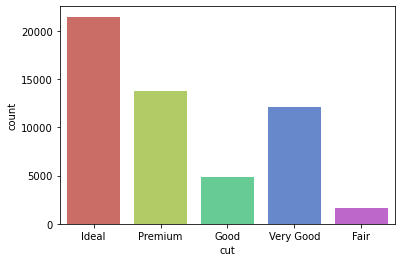

In [14]:
sns.countplot('cut',data=ddata,palette='hls')
plt.show()

In [15]:
import plotly.express as px

In [16]:
ddata.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [17]:
ddata.cut.value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

In [18]:
px.histogram(ddata,x='color',color='color')


In [19]:
ddata.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [20]:

ddata.clarity.value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

In [21]:
px.histogram(ddata,'clarity',color='clarity')

In [22]:
ddata=ddata.drop(ddata[ddata['x']==0].index)
ddata=ddata.drop(ddata[ddata['y']==0].index)
ddata=ddata.drop(ddata[ddata['z']==0].index)

In [23]:
ddata.shape

(53775, 10)

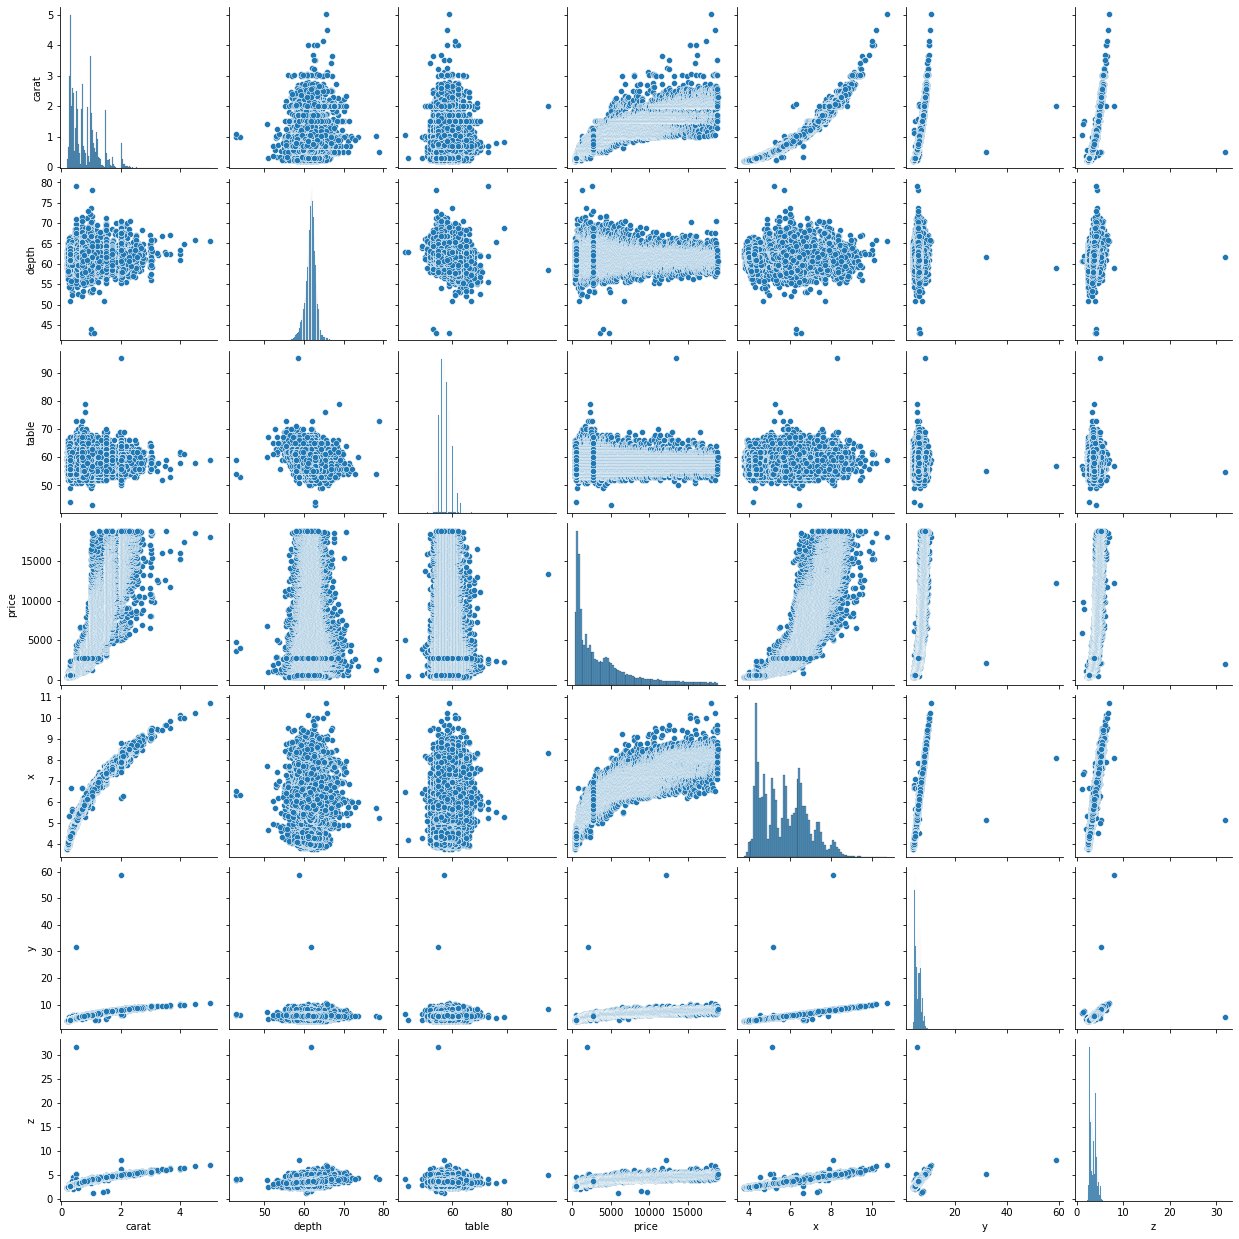

In [24]:
sns.pairplot(ddata)
plt.show()

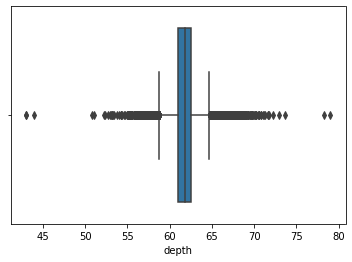

In [25]:
sns.boxplot(ddata['depth'])
plt.show()

In [26]:
ddepth=ddata['depth']
q3=ddepth.quantile(0.75)
q1=ddepth.quantile(0.45)
iqr=q3-q1
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
depth_ol=ddepth[(ddepth<lower_limit)|(ddepth>upper_limit)]
depth_ol

1        59.8
2        56.9
8        65.1
9        59.4
10       64.0
         ... 
53918    59.3
53927    58.1
53930    60.5
53931    59.8
53932    60.5
Name: depth, Length: 11924, dtype: float64

In [27]:
ddata=ddata[(ddata['depth']<75)&(ddata['depth']>45)]

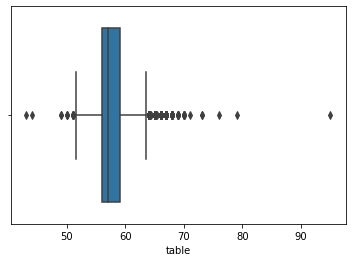

In [28]:
sns.boxplot(ddata['table'])
plt.show()

In [29]:
dtable=ddata['table']
q3=dtable.quantile(0.80)
q1=dtable.quantile(0.40)
iqr=q3-q1
lower_limit=q1-(iqr*1.5)
upper_limit=q3+(iqr*1.5)
table_ol=dtable[(dtable<lower_limit)|(dtable>upper_limit)]
table_ol

2        65.0
43       63.0
91       69.0
115      53.0
122      63.0
         ... 
53825    63.0
53828    63.0
53840    63.0
53881    53.0
53897    63.0
Name: table, Length: 1966, dtype: float64

In [30]:
ddata=ddata[(ddata['table']<80)&(ddata['table']>40)]

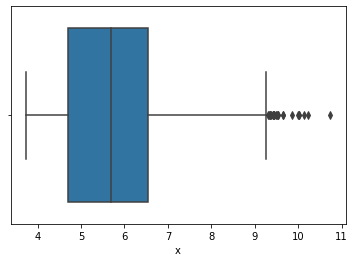

In [31]:
sns.boxplot(ddata['x'])
plt.show()

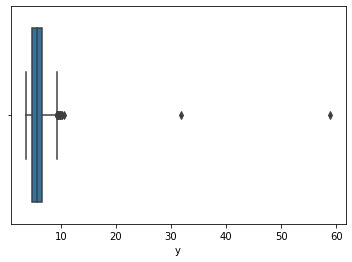

In [32]:

sns.boxplot(ddata['y'])
plt.show()

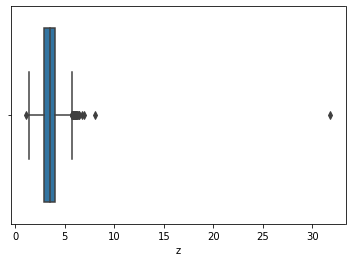

In [33]:
sns.boxplot(ddata['z'])
plt.show()

In [34]:
ddata.shape

(53769, 10)

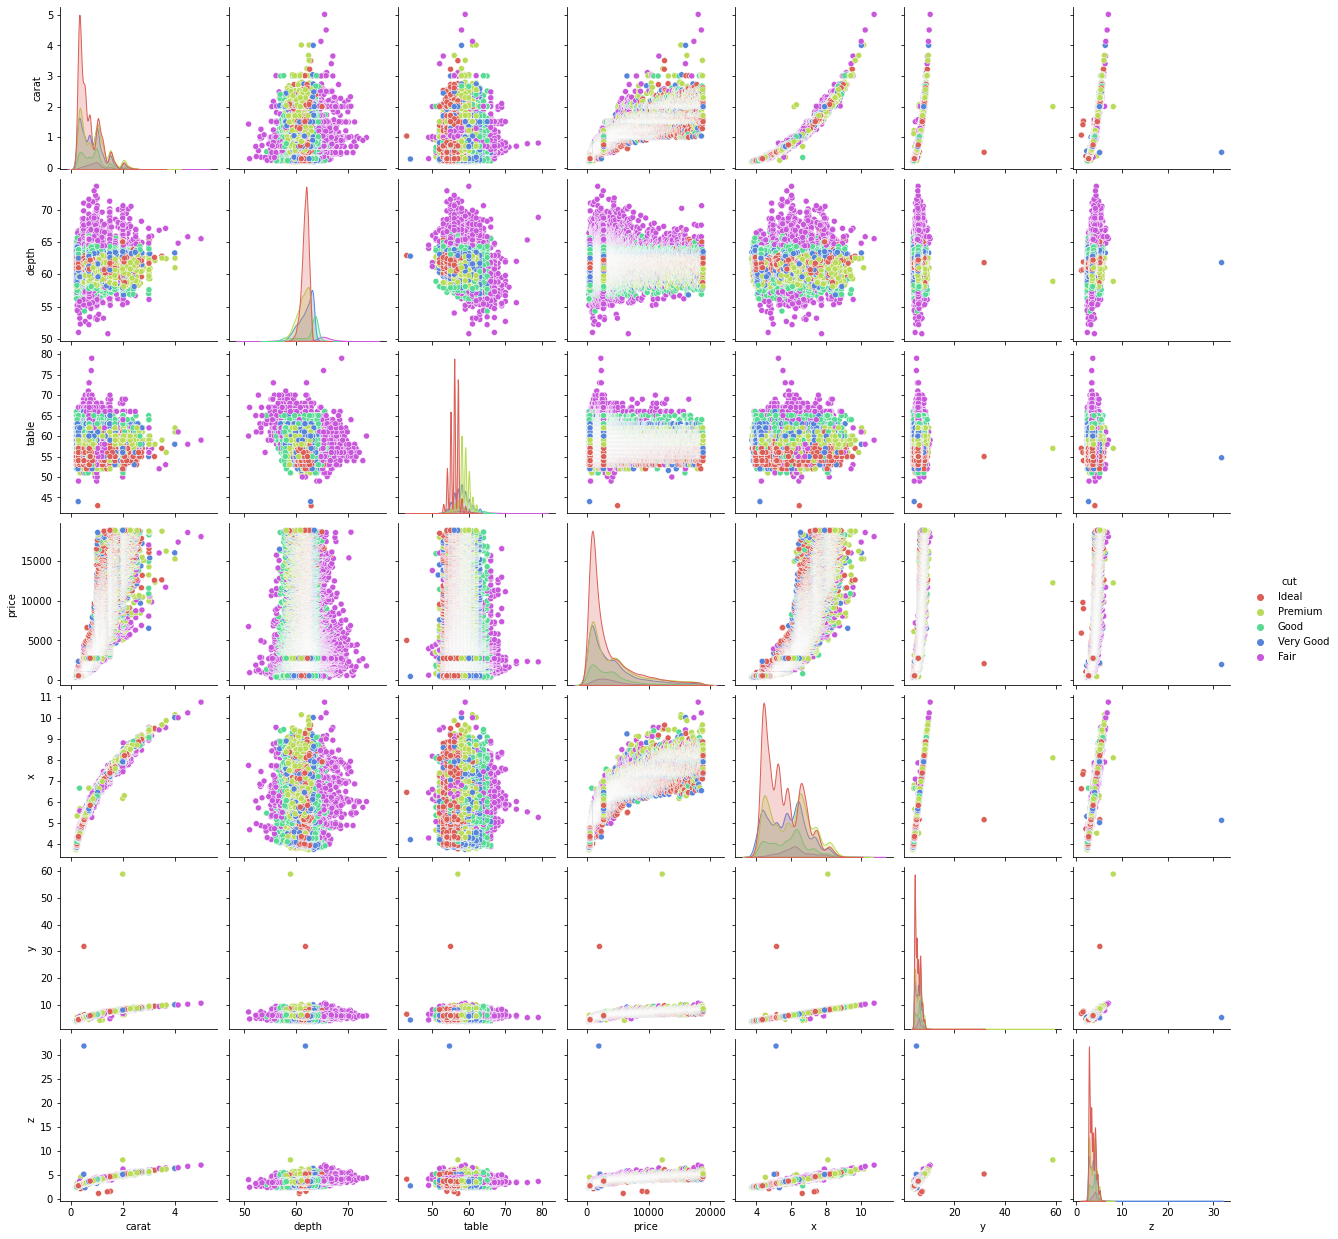

In [35]:
sns.pairplot(ddata,hue='cut',palette='hls')
plt.show()


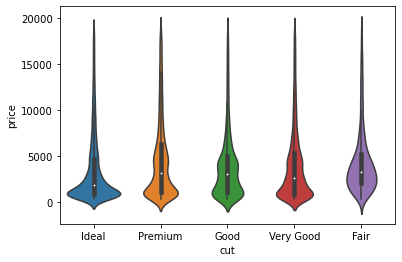

In [36]:
sns.violinplot(x='cut',y='price',data=ddata)
plt.show()

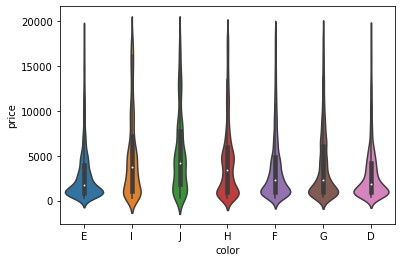

In [38]:
sns.violinplot(x='color',y='price',data=ddata)
plt.show()

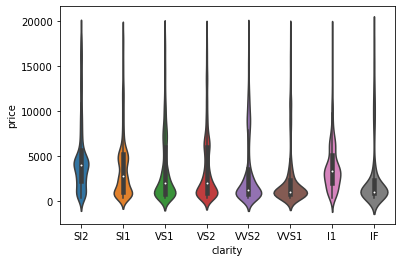

In [39]:
sns.violinplot(x='clarity',y='price',data=ddata)
plt.show()

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [41]:
s=ddata.dtypes=='object'
object_cols=list(s[s].index)

In [45]:
label_data=ddata.copy()
le=LabelEncoder()
for col in object_cols:
    label_data[col]=le.fit_transform(label_data[col])

In [47]:
label_data.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [48]:
ddata.describe()

carat         depth         table         price             x  \
count  53769.000000  53769.000000  53769.000000  53769.000000  53769.000000   
mean       0.797502     61.748692     57.457001   3931.107125      5.731504   
std        0.473160      1.419299      2.226304   3985.909720      1.118604   
min        0.200000     50.800000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     73.600000     79.000000  18823.000000     10.740000   

                  y             z  
count  53769.000000  53769.000000  
mean       5.734839      3.539883  
std        1.139448      0.702007  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

In [49]:
ddata.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028594  0.181023  0.921557  0.977857  0.953979  0.961055
depth  0.028594  1.000000 -0.301942 -0.010868 -0.024783 -0.028853  0.095556
table  0.181023 -0.301942  1.000000  0.126365  0.195452  0.183791  0.151563
price  0.921557 -0.010868  0.126365  1.000000  0.887136  0.867679  0.868075
x      0.977857 -0.024783  0.195452  0.887136  1.000000  0.974819  0.975411
y      0.953979 -0.028853  0.183791  0.867679  0.974819  1.000000  0.956653
z      0.961055  0.095556  0.151563  0.868075  0.975411  0.956653  1.000000

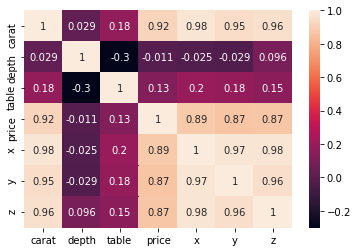

In [50]:
sns.heatmap(ddata.corr(),annot=True)
plt.show()

In [51]:
x=label_data.drop(['price'],axis=1)
y=label_data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [52]:
pipeline_lr=Pipeline([('scaler1',StandardScaler()),
                     ('lr_classifier',LinearRegression())])
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
                     ('dt_classifier',DecisionTreeRegressor())])
pipeline_rf=Pipeline([('scaler3',StandardScaler()),
                     ('rf_classifier',RandomForestRegressor())])
pipeline_kn=Pipeline([('scaler4',StandardScaler()),
                      ('kn_classifier',KNeighborsRegressor())])
pipeline_xgb=Pipeline([('scaler5',StandardScaler()),
                       ('xgb_classifier',XGBRegressor())])
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_kn,pipeline_xgb]

pipe_dict={0:'LinearRegression',1:'DecisionTree',2:'RandomForest',3:'KNeighbor',4:'XGBRegresor'}

for pipe in pipelines:
    pipe.fit(x_train,y_train)

In [53]:
cv_results_rms=[]
for i , model in enumerate(pipelines):
    cv_score=cross_val_score(model,x_train,y_train,scoring='neg_root_mean_squared_error')
    cv_results_rms.append(cv_score)
    print('%s: %f' % (pipe_dict[i],cv_score.mean()))

LinearRegression: -1439.235585
DecisionTree: -754.829798
RandomForest: -555.036212
KNeighbor: -829.681585
XGBRegresor: -559.055117


In [54]:
pred=pipeline_xgb.predict(x_test)

In [55]:
print('Training accuracy:',pipeline_rf.score(x_train,y_train))
print('test accuracy:', pipeline_rf.score(x_test,y_test))

Training accuracy: 0.9973856369444188
test accuracy: 0.9809212504231396
